## Live Cattle Futures, Cash Price, Basis

In [9]:
import pandas as pd
import seaborn as sns

import src

import warnings
warnings.filterwarnings('ignore')

In [2]:
live_cattle_futures = pd.read_csv('csv/live_cattle_futures.csv')
live_cattle_futures = src.clean_tv_data(live_cattle_futures)
adj_live_cattle_futures = src.adjust_series_cpi(live_cattle_futures)

In [3]:
price_received_ge_500_national = pd.read_csv('csv/price_received_ge_500_national.csv')
price_received_ge_500_national = src.usda_clean_monthly(price_received_ge_500_national)
adj_price_received_ge_500_national = src.adjust_series_cpi(price_received_ge_500_national)

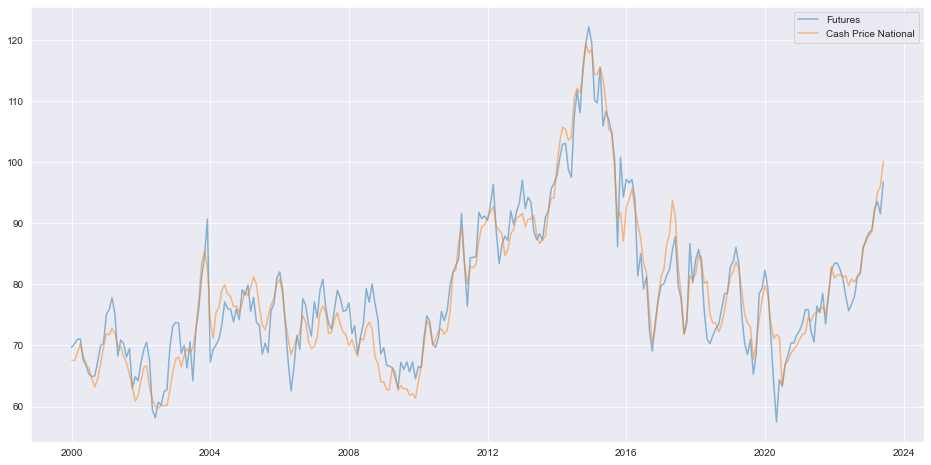

In [4]:
src.lineplot_mult_same_axis(
    adj_live_cattle_futures.resample('MS').first(),
    adj_price_received_ge_500_national,
    "Futures",
    'Cash Price National',
    title="Live Cattle Futures vs. Cash Price")

No handles with labels found to put in legend.


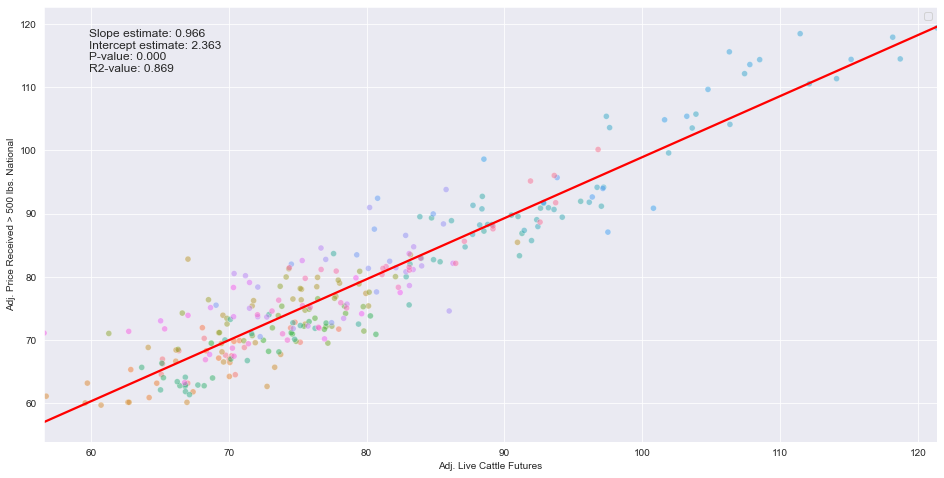

In [5]:
src.scatterplot(adj_live_cattle_futures, adj_price_received_ge_500_national, 'Adj. Live Cattle Futures', 'Adj. Price Received > 500 lbs. National', reg=True)

In [6]:
price_received_ge_500_state = pd.read_csv('csv/price_received_ge_500_state.csv')
price_received_ge_500_state = src.usda_clean_monthly(price_received_ge_500_state, only_value=False)


In [7]:
price_received_ge_500_state = pd.pivot_table(price_received_ge_500_state, values='Value', index=['Date'], columns=['State'])

<AxesSubplot:xlabel='Date'>

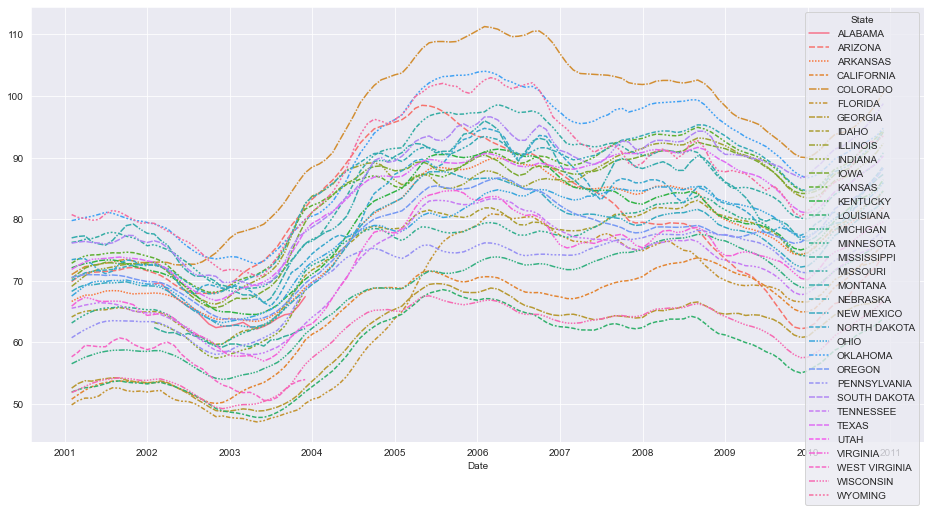

In [8]:
sns.lineplot(data=price_received_ge_500_state.rolling(14).mean())

- Do more analysis on the different basis by state